# sonarlight 
## Example notebook

### Load sonar data

Use own sonar log files in '.sl2' or '.sl3' format or download example data files from https://github.com/KennethTM/sonarlight/tree/main/example_files.

In [1]:
import sonarlight
from sonarlight import Sonar

#Package version
print(sonarlight.__version__)

#Read data from a '.sl2' or '.sl3' file
sl2 = Sonar('example_files/example_sl2_file.sl2')

0.1.3


In [2]:
#See summary of data and available channels
sl2

Summary of SL2 file:

- Primary channel with 1288 frames
- Secondary channel with 1288 frames
- Downscan channel with 1288 frames
- Sidescan channel with 1287 frames

Start time: 2023-09-13 08:26:12.654000128
End time: 2023-09-13 08:27:06.792999936

File info: version 2, device 2, blocksize 3200, frame version 8

In [3]:
#View raw data store in Pandas dataframe
sl2.df

,id,survey,datetime,x,y,longitude,latitude,min_range,max_range,water_depth,gps_speed,gps_heading,gps_altitude,bottom_index,frames
0,0,primary,2023-09-13 08:26:12.654000128,1369642,7488185,12.345094,55.773088,0.00000,19.994879,3.202414,0.892609,2.680538,50.060001,492,"[203, 144, 140, 137, 134, 135, 137, 139, 143, ..."
3,0,secondary,2023-09-13 08:26:12.654000128,1369642,7488185,12.345094,55.773088,0.00000,19.994879,3.202414,0.892609,2.680538,50.060001,492,"[203, 144, 140, 137, 134, 135, 137, 139, 143, ..."
6,0,downscan,2023-09-13 08:26:12.816999936,1369642,7488185,12.345094,55.773088,0.00000,12.009120,3.202414,0.892609,2.680538,50.060001,373,"[129, 110, 90, 90, 85, 80, 81, 83, 89, 92, 91,..."
7,0,sidescan,2023-09-13 08:26:12.819000064,1369642,7488185,12.345094,55.773088,-18.01368,18.013680,3.202414,0.892609,2.680538,50.060001,248,"[31, 30, 30, 30, 31, 30, 25, 21, 23, 27, 33, 3..."
8,1,primary,2023-09-13 08:26:12.696999936,1369642,7488185,12.345094,55.773088,0.00000,19.994879,3.202414,0.892609,2.680538,50.060001,492,"[203, 143, 140, 137, 134, 135, 137, 139, 143, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10294,1286,downscan,2023-09-13 08:27:06.749000192,1369680,7488101,12.345437,55.772662,0.00000,12.009120,3.534954,0.704264,1.978045,51.070000,412,"[126, 108, 90, 90, 85, 80, 81, 84, 89, 92, 91,..."
10295,1286,sidescan,2023-09-13 08:27:06.750999808,1369680,7488101,12.345437,55.772662,-18.01368,18.013680,3.534954,0.704264,1.978045,51.070000,274,"[30, 34, 34, 32, 31, 32, 33, 32, 33, 34, 35, 3..."
10296,1287,primary,2023-09-13 08:27:06.710000128,1369680,7488101,12.345437,55.772662,0.00000,19.994879,3.540779,0.704264,1.978045,51.070000,544,"[199, 139, 134, 129, 125, 124, 129, 132, 138, ..."
10299,1287,secondary,2023-09-13 08:27:06.710000128,1369680,7488101,12.345437,55.772662,0.00000,19.994879,3.540779,0.704264,1.978045,51.070000,544,"[199, 139, 134, 129, 125, 124, 129, 132, 138, ..."


### Write to other file formats

In [ ]:
#Each row contains metadata and pixel for each recorded frame. Pixels are stored in the "frames" column.
#The dataframe can be saved for further processing, for example the Parquet file format that supports nested data structues.
sl2.df.to_parquet('sl2.parquet')

#Or to '.csv' file
sl2.df.to_csv("sl2.csv")

#Or to '.csv' file after dropping the "frames" column containing nested arrays
df_csv = sl2.df.copy().drop(["frames"], axis=1)
df_csv.to_csv("sl2.csv")

### Plotting

In [4]:
import matplotlib.pyplot as plt

#### Route

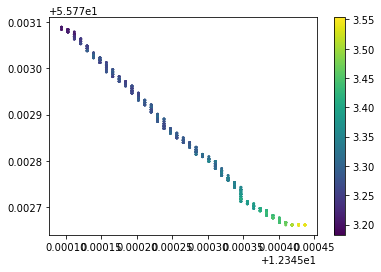

In [5]:
#Plot route and water depth (meters)
route = sl2.df.query("survey == 'primary'")
plt.scatter(route["longitude"], route["latitude"], c=route["water_depth"], s = 3)
plt.colorbar()


In [6]:
#Plot route with augmented coordinates
sl2_augmented = Sonar('example_files/example_sl2_file.sl2', augment_coords=True)

#Data frame now contained augmented x/y and longitude/latitude columns
sl2_augmented.df


,id,survey,datetime,x,y,longitude,latitude,min_range,max_range,water_depth,gps_speed,gps_heading,gps_altitude,bottom_index,frames,x_augmented,y_augmented,longitude_augmented,latitude_augmented
0,0,primary,2023-09-13 08:26:12.654000128,1369642,7488185,12.345094,55.773088,0.00000,19.994879,3.202414,0.892609,2.680538,50.060001,492,"[203, 144, 140, 137, 134, 135, 137, 139, 143, ...",1.369642e+06,7.488185e+06,12.345094,55.773088
1,1,primary,2023-09-13 08:26:12.696999936,1369642,7488185,12.345094,55.773088,0.00000,19.994879,3.202414,0.892609,2.680538,50.060001,492,"[203, 143, 140, 137, 134, 135, 137, 139, 143, ...",1.369642e+06,7.488185e+06,12.345094,55.773088
2,2,primary,2023-09-13 08:26:12.737999872,1369642,7488185,12.345094,55.773088,0.00000,19.994879,3.205708,0.892609,2.680538,50.060001,492,"[203, 144, 140, 137, 134, 135, 137, 139, 143, ...",1.369642e+06,7.488185e+06,12.345095,55.773088
3,3,primary,2023-09-13 08:26:12.782000128,1369642,7488185,12.345094,55.773088,0.00000,19.994879,3.205708,0.891785,2.683248,50.060001,492,"[203, 143, 140, 137, 134, 135, 137, 139, 143, ...",1.369642e+06,7.488185e+06,12.345095,55.773088
4,4,primary,2023-09-13 08:26:12.822000128,1369642,7488185,12.345094,55.773088,0.00000,19.994879,3.210137,0.890999,2.685835,50.060001,493,"[203, 144, 140, 137, 134, 135, 136, 139, 143, ...",1.369642e+06,7.488185e+06,12.345095,55.773087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5146,1282,sidescan,2023-09-13 08:27:06.588999936,1369680,7488101,12.345437,55.772662,-18.01368,18.013680,3.541934,0.701013,1.997083,50.959999,275,"[37, 40, 41, 40, 33, 27, 22, 17, 21, 25, 28, 3...",1.369672e+06,7.488118e+06,12.345367,55.772747
5147,1283,sidescan,2023-09-13 08:27:06.641999872,1369680,7488101,12.345437,55.772662,-18.01368,18.013680,3.541934,0.701883,1.991987,51.070000,275,"[16, 21, 24, 23, 19, 14, 11, 7, 11, 12, 10, 18...",1.369672e+06,7.488118e+06,12.345368,55.772747
5148,1284,sidescan,2023-09-13 08:27:06.683000064,1369680,7488101,12.345437,55.772662,-18.01368,18.013680,3.540779,0.702714,1.987122,51.070000,275,"[27, 24, 26, 21, 21, 24, 26, 28, 23, 20, 21, 2...",1.369672e+06,7.488118e+06,12.345368,55.772747
5149,1285,sidescan,2023-09-13 08:27:06.723000064,1369680,7488101,12.345437,55.772662,-18.01368,18.013680,3.534954,0.703507,1.982478,51.070000,274,"[22, 26, 23, 18, 19, 20, 22, 22, 22, 23, 22, 1...",1.369672e+06,7.488118e+06,12.345369,55.772747


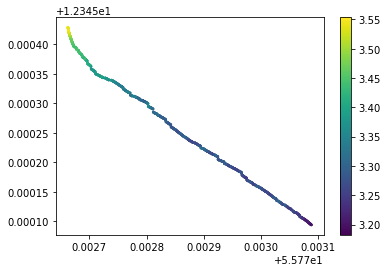

In [7]:
#Coordinate augmentation smoothens the recorded coordinate which are rounded to the nearest meter.
route_augmented = sl2_augmented.df.query("survey == 'primary'")
plt.scatter(route_augmented["latitude_augmented"], route_augmented["longitude_augmented"], c=route_augmented["water_depth"], s = 3)
plt.colorbar()


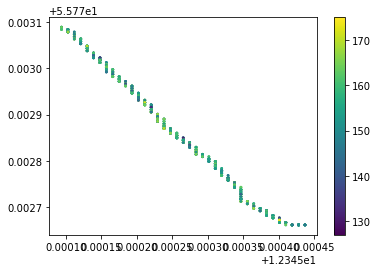

In [8]:
#Plot sonar intensity at water depth (sediment surface)
intensity = sl2.bottom_intensity("primary")
plt.scatter(route["longitude"], route["latitude"], c=intensity, s = 3)
plt.colorbar()


#### Raw sonar imagery

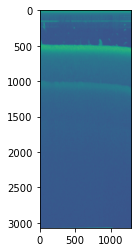

In [9]:
#Plot primary channel
prim = sl2.image("primary")
plt.imshow(prim.transpose())

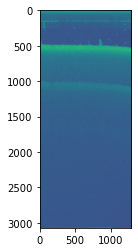

In [10]:
#Plot secondary channel
secondary = sl2.image("secondary")
plt.imshow(secondary.transpose())

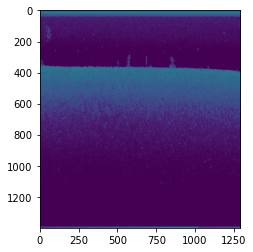

In [11]:
#Plot downscan channel
downscan = sl2.image("downscan")
plt.imshow(downscan.transpose())

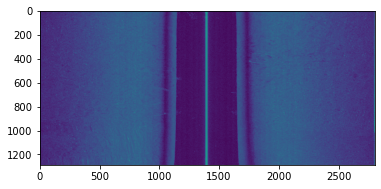

In [12]:
#Plot sidescan channel
sidescan = sl2.image("sidescan")
plt.imshow(sidescan)

#### Water column sonar imagery

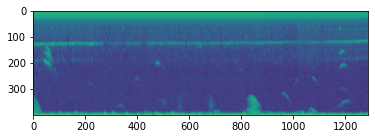

In [13]:
#Plot water column (surface to water_depth) from primary channel
#Individual frames are linearly interpolated of length 'pixels'
primary_water = sl2.water("primary", pixels=400)
plt.imshow(primary_water.transpose())

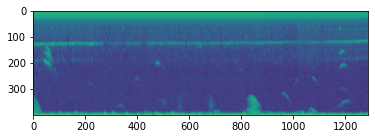

In [14]:
#Plot water column (surface to water_depth) from secondary channel
#Individual frames are linearly interpolated of length 'pixels'
secondary_water = sl2.water("secondary", pixels=400)
plt.imshow(secondary_water.transpose())

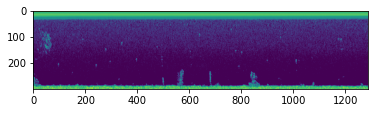

In [15]:
#Plot water column (surface to water_depth) from downscan channel
#Individual frames are linearly interpolated of length 'pixels'
downscan_water = sl2.water("downscan", pixels=300)
plt.imshow(downscan_water.transpose())

#### Bottom sonar imagery

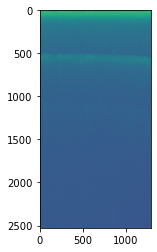

In [16]:
#Plot bottom column (water_depth to max sonar range) from primary channel
#Individual frames are subsetted to match the minimum length of the bottom frames
primary_bottom = sl2.bottom("primary")
plt.imshow(primary_bottom.transpose())

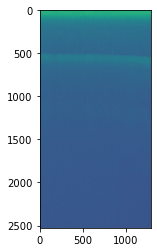

In [17]:
#Plot bottom column (water_depth to max sonar range) from primary channel
#Individual frames are subsetted to match the minimum length of the bottom frames
secondary_bottom = sl2.bottom("secondary")
plt.imshow(secondary_bottom.transpose())

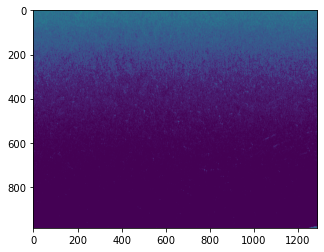

In [18]:
#Plot bottom column (water_depth to max sonar range) from primary channel
#Individual frames are subsetted to match the minimum length of the bottom frames
downscan_bottom = sl2.bottom("downscan")
plt.imshow(downscan_bottom.transpose())

#### Georeferenced sidescan imagery

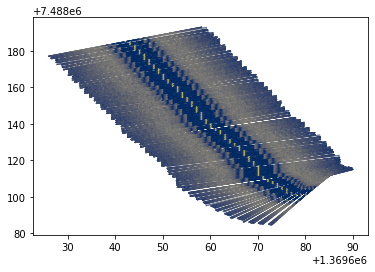

In [19]:
#Plot sidescan georeferenced points
#Convert sidescan imagery to XYZ point cloud
#Note that this can result in MANY points, every 10'th point are plotted here
mosaic=sl2.sidescan_xyz()
plt.scatter(mosaic.x[::10], 
            mosaic.y[::10], 
            c=mosaic.z[::10], 
            cmap="cividis", s=0.05)

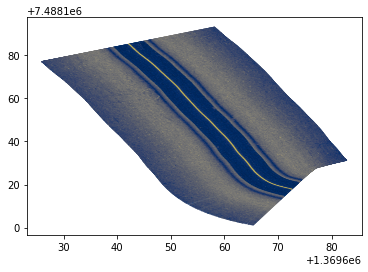

In [20]:
#Plot sidescan with augmented coordinates
mosaic_augmented=sl2_augmented.sidescan_xyz()
plt.scatter(mosaic_augmented.x[::10], 
            mosaic_augmented.y[::10], 
            c=mosaic.z[::10], 
            cmap="cividis", s=0.05)